In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def read_efs_table(efs_table, group):
    efs_df = pd.read_csv(efs_table)
    efs_df["group"] = group
    return efs_df

In [3]:
root_dir = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization"
groups = ["white_british_male", "white_british_female", "pre_menopause", "post_menopause"]


efs_dfs = []

for group in groups:
    filename = os.path.join(root_dir, group, "data/effect_sizes/all.csv")
    efs_df_group = read_efs_table(filename, group)
    efs_dfs.append(efs_df_group)

In [4]:
efs_df = pd.concat(efs_dfs)

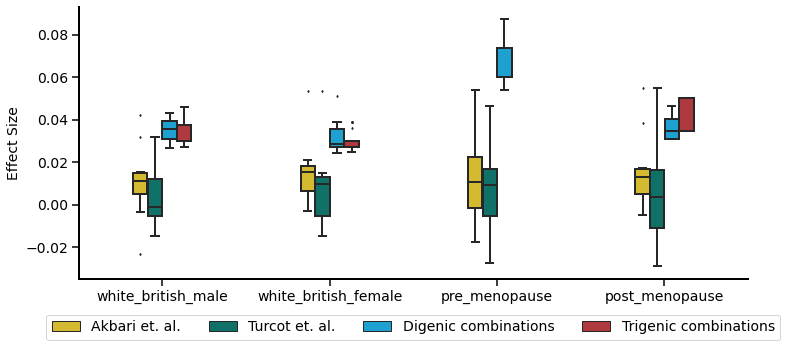

In [5]:
boxdf = efs_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(12, 5))

# Box Plot
sns_ax = sns.boxplot(
    data=boxdf,
    x="group",
    y="Effect Size",
    hue="Description",
    hue_order=["Akbari et. al.", "Turcot et. al.", "Digenic combinations", "Trigenic combinations", ],
    palette=["#eecc16", "#008176", "#00ADEE", "#c1272d"],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    orient="v",
    width=0.35,
    linewidth=2,
    fliersize=1.5,
    ax=ax
    )

# Adjust Axis
# sns_ax.ax.set_yticks([-0.02, 0, 0.02, 0.04])
# sns_ax.ax.set_ylim((-0.025, 0.05))
sns_ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.25))